In [2]:
import cv2
import io
import matplotlib.pyplot as plt
import numpy as np

# Template Matching

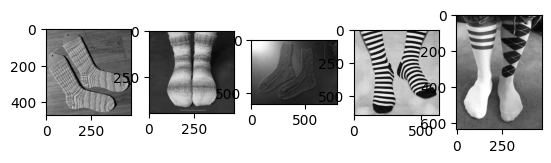

In [3]:
images = []
for i in [1,2,3,4,5]:
    image = cv2.imread('matching_data/'+str(i)+'.jpeg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

fig, ax = plt.subplots(1,len(images))
for i in range(len(images)):
    ax[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

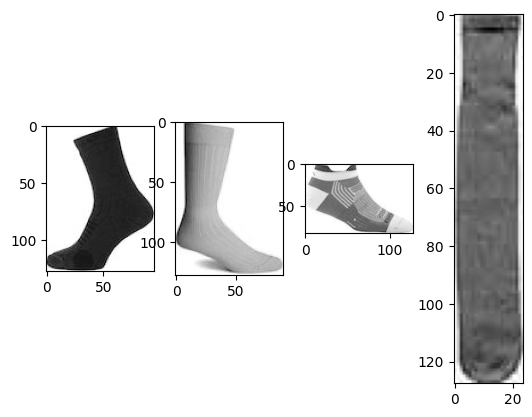

In [4]:
templates = []
for i in [1,2,3,4]:
    template = cv2.imread('matching_data/'+'t'+str(i)+'.jpeg')
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    templates.append(template)

fig, ax = plt.subplots(1,len(templates))
for i in range(len(templates)):
    ax[i].imshow(templates[i], cmap='gray')
plt.show()

In [107]:
def findSock(img, threshold=0.5):
    img_g=cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
    i=0
    for template in templates[:1]:
        match_probs = cv2.matchTemplate(img_g, template, cv2.TM_CCOEFF_NORMED)  
        
        w, h = template.shape

        if False: # version 1 - single object
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match_probs)
            top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)
            img = cv2.rectangle(img, top_left, bottom_right, (i*50, 0, 0), 5) #assume less than 5 templates

        else: # version 2 - multiple objects
            match_found = False
            match_conf = np.where(match_probs >= threshold)
            for (x, y) in zip(match_conf[1], match_conf[0]):
                match_found = True
                top_left = (x, y)
                bottom_right = (x+w, y+h)
                img = cv2.rectangle(img, top_left, bottom_right, (i*50, 0, 0), 1) #assume less than 5 templates

        if match_found:
            plt.imshow(img)
        i+=1
        
    plt.show()

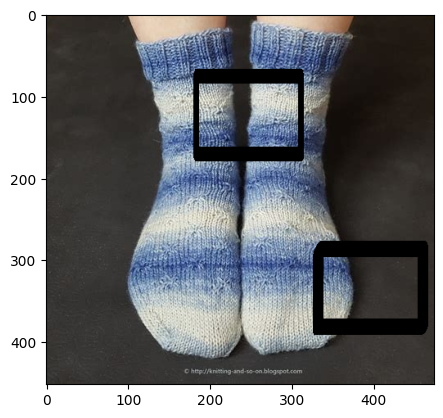

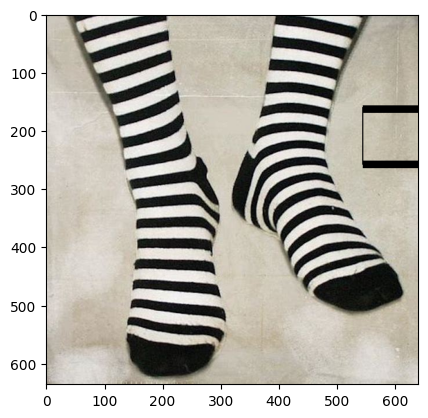

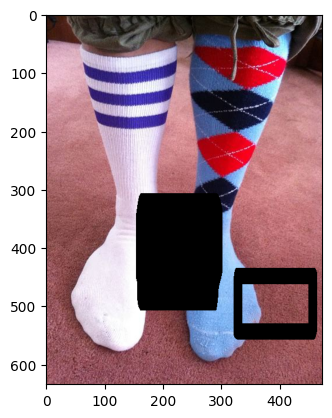

In [110]:
for image in images:
    findSock(image)

In [39]:
template_matching = cv2.matchTemplate(img2, template2, cv2.TM_CCOEFF_NORMED)
template_matching.shape

(8, 101)

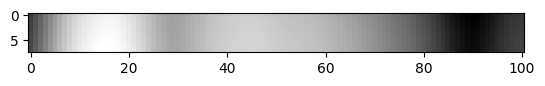

In [41]:
plt.imshow(template_matching, cmap='gray')
plt.show()

In [36]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(template_matching)
print(min_val, max_val)
print(min_loc, max_loc)

0.33427295088768005 0.5013687014579773
(90, 0) (16, 7)


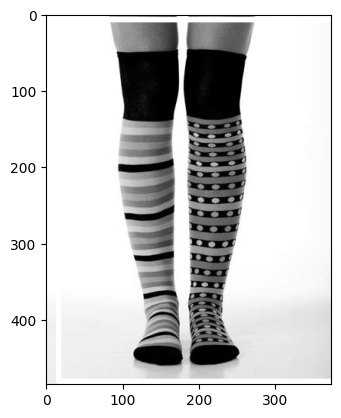

In [29]:
location = max_loc
H, W = template1.shape
bottom_right = (location[0] + W, location[1] + H)
res = cv2.rectangle(img2.copy(), location,bottom_right, 255, 5)
plt.imshow(res, cmap='gray')
plt.show()